# 1. PCA

1.Concept: particularly, transform variables into a new set of variables. As these are a linear combination of original variables. These new set of variables are known as principal components. Further, we need to obtain these in particular way. As first principle component accounts for the possible variation of original data. After which each succeeding component has the highest possible variance. The second principal component must be orthogonal to the first principal component. For two-dimensional dataset, there can be only two principal components. Applying PCA to your dataset loses its meaning.

 
2.Reason to reduce the dimension:
    
    1.increase the speed of training time 
    2.use less memory 
    3.easy to visualize

3.Applying feature scaling before PCA

4.PCA choose the direction with minimum information reduction

# 2. Dimensionality reduction 
In many datasets there are often too many features based on which the conclusion drawn. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. It can be imagined that a 2D data i.e a data having two features which are linearly dependent on each other, such data can be reduced to a single dimension. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. 

### 2.1. Advantages of dimensionality reduction
   1. It reduces the time and storage space required.
   
   2. Removal of multi-collinearity improves the performance of the machine-learning model.
   
   3. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D. 
    
### 2.2. Disadvantages of dimensionality reduction 

   1. It may lead to some amount of data loss.
   
   2. PCA tends to find linear correlations between variables, which is sometimes undesirable.
   
   3. PCA fails in cases where mean and covariance are not enough to define datasets.
   
   4. We may not know how many principal components to keep- in practice, some thumb rules are applied.
    

## 3. PCA: in-built

### 3.1. Applying PCA to 2D data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
x1 = np.array([1,2,3,4,5,6])
x2 = np.array([7.5, 11, 16, 18, 20, 26])

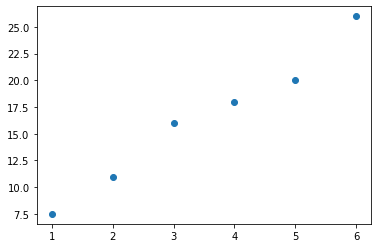

In [3]:
plt.scatter(x1, x2)
plt.show()

In [16]:
X = np.c_[x1, x2]
X

array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

In [17]:
pca = PCA()
x_transformed=pca.fit_transform(X)
x_transformed

array([[-9.26049952e+00,  9.65263430e-03],
       [-5.62047228e+00,  2.38560598e-02],
       [-5.36562171e-01, -3.68391297e-01],
       [ 1.65958219e+00,  5.22629108e-02],
       [ 3.85572654e+00,  4.72917119e-01],
       [ 9.90222524e+00, -1.90297426e-01]])

In [18]:
pca.components_#first element is the first direction and second element is the second direction

array([[ 0.27096719,  0.96258858],
       [ 0.96258858, -0.27096719]])

In [19]:
pca.inverse_transform(x_transformed)

array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

In [20]:
pca = PCA(n_components = 1)#pass how many conponents you want to pass
x_transformed=pca.fit_transform(X)
x_transformed

array([[-9.26049952],
       [-5.62047228],
       [-0.53656217],
       [ 1.65958219],
       [ 3.85572654],
       [ 9.90222524]])

In [21]:
pca.components_

array([[0.27096719, 0.96258858]])

In [24]:
X_approx=pca.inverse_transform(x_transformed)#lost some informtion but not too much
X_approx

array([[ 0.99070848,  7.50261555],
       [ 1.97703643, 11.00646421],
       [ 3.35460926, 15.90017805],
       [ 3.94969232, 18.01416153],
       [ 4.54477538, 20.12814502],
       [ 6.18317813, 25.94843564]])

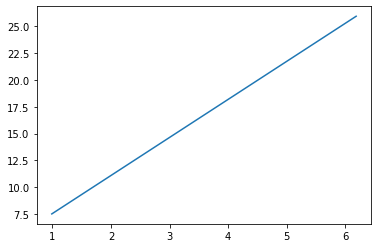

In [25]:
plt.plot(X_approx[:, 0], X_approx[:, 1])
plt.show()

### 3.2. Applying PCA on 3D data

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [27]:
np.random.seed(2343243)

In [28]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)

In [29]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

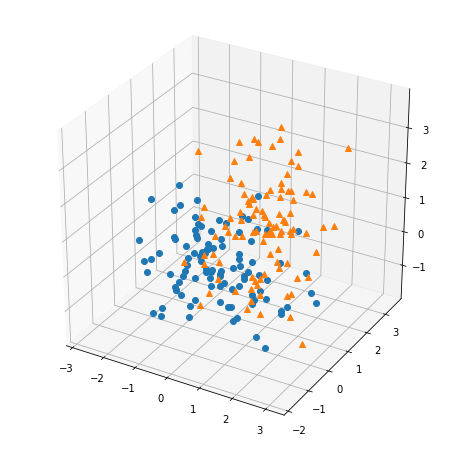

In [30]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

In [31]:
all_data = np.concatenate((class1, class2))

In [32]:
pca = PCA(n_components = 2)
transformed_data = pca.fit_transform(all_data)
transformed_data

array([[-0.52351425, -0.63301617],
       [-0.78786184,  0.94206431],
       [-1.28725924,  0.54439067],
       [ 0.66747707,  1.69846274],
       [-1.74150174, -0.755306  ],
       [-1.03559449, -1.53950125],
       [-0.21765053, -0.85555712],
       [-0.7648506 , -0.46590375],
       [-0.64255217,  1.16920769],
       [-0.5783154 , -0.30888845],
       [ 0.25251683, -0.38101091],
       [-0.26298255, -0.44282938],
       [-0.86147962,  0.21339394],
       [-0.9917517 , -0.32293363],
       [-1.3133147 ,  0.01268907],
       [-1.09145198, -0.50248537],
       [-2.05840949, -1.13678107],
       [-0.62975084, -1.78591257],
       [-1.75005325, -1.27909834],
       [-0.66142546,  1.66188479],
       [-0.34624366,  0.47524286],
       [ 0.77989322,  0.76153114],
       [-0.22203858, -0.7362751 ],
       [-1.06469867,  0.33693758],
       [-1.93640401, -0.97234577],
       [-2.44237038, -0.34276504],
       [-1.7918403 ,  0.40615644],
       [ 0.33656537,  1.36869154],
       [-1.38894876,

In [33]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

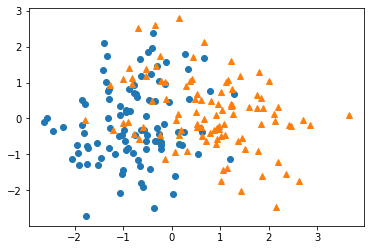

In [34]:
plt.plot(transformed_data[0:100,0],transformed_data[0:100,1],"o")
plt.plot(transformed_data[100:200,0],transformed_data[100:200,1],"^")
plt.show()

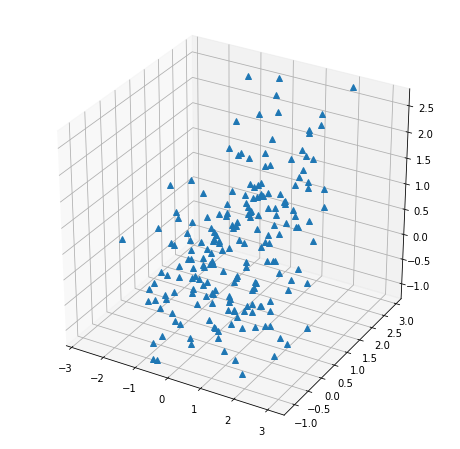

In [35]:
X_approx = pca.inverse_transform(transformed_data)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(X_approx[:, 0], X_approx[:, 1], X_approx[:, 2], '^')
plt.show()

In [36]:
a = -0.409689
b = 7.2827
c = - 7.1008
i = 10
a * X_approx[i][0] + b* X_approx[i][1] + c * X_approx[i][2]

1.0000358864489582

### 3.3 Applying PCA on Breask cancer dataset

In [57]:
from sklearn import decomposition,ensemble,datasets,linear_model
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
breast_cancer=datasets.load_breast_cancer()

In [41]:
x=breast_cancer.data
x.shape

(569, 30)

In [50]:
sc=StandardScaler()
x_std=sc.fit_transform(x)

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x_std,breast_cancer.target,random_state=0)

In [54]:
pca=decomposition.PCA(n_components=15)

In [66]:
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
x_train_pca.shape

(426, 15)

In [61]:
lr=linear_model.LogisticRegression()
start=time.time()
lr.fit(x_train,y_train)
end=time.time()
print(end-start)
print(lr.score(x_test,y_test))

0.0040149688720703125
0.965034965034965


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
lr=linear_model.LogisticRegression()
start=time.time()
lr.fit(x_train_pca,y_train)
end=time.time()
print(end-start)
print(lr.score(x_test_pca,y_test))

0.003023862838745117
0.958041958041958


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
pca.explained_variance_

array([13.02746837,  5.81556555,  2.85848795,  1.91901713,  1.70021491,
        1.20663908,  0.65333715,  0.42673847,  0.42645054,  0.34558986,
        0.30805491,  0.25605447,  0.228152  ,  0.14326274,  0.0926283 ])

## 4. Finding optimal number of features

Value of k is directly proportional to variance explained by data, thus selecting an optimal value of k is very imporatant. Primary objective should be to select k small enough to explain maximum variance is the transformed data. Then transforming the data into k dimensions.


In [68]:
from sklearn import decomposition,ensemble,datasets,linear_model
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [69]:
breast_cancer=datasets.load_breast_cancer()
x=breast_cancer.data
sc=StandardScaler()
x_std=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_std,breast_cancer.target,random_state=0)

In [70]:
pca=decomposition.PCA()

In [71]:
pca.fit_transform(x_train)

array([[-2.83807710e+00, -3.19380204e-01, -5.09786956e-01, ...,
         2.21524204e-03,  1.76560105e-02,  2.17290491e-03],
       [-3.23881077e+00,  9.46695152e-01,  1.46301470e+00, ...,
        -3.50930341e-03,  1.56914143e-02,  1.44518116e-02],
       [ 3.92831902e+00, -3.30091570e+00,  1.84183164e+00, ...,
         2.00501871e-02, -3.44990391e-02, -1.16657352e-02],
       ...,
       [-3.17962251e+00,  4.33267733e-01,  5.77005027e-01, ...,
         3.85704447e-02, -4.18716728e-02,  1.59435183e-02],
       [-5.59141525e+00, -7.52889177e-01,  4.06478207e+00, ...,
         1.97618354e-02, -1.70355933e-02,  4.38111630e-03],
       [-1.20802261e+00,  1.32965049e+00,  1.26115052e+00, ...,
        -1.32544095e-02, -1.58653526e-03, -1.14601436e-02]])

In [72]:
pca.explained_variance_

array([1.30274684e+01, 5.81556555e+00, 2.85848795e+00, 1.91901713e+00,
       1.70021491e+00, 1.20663908e+00, 6.53337152e-01, 4.26738474e-01,
       4.26450541e-01, 3.45589858e-01, 3.08054910e-01, 2.56054468e-01,
       2.28152003e-01, 1.43262745e-01, 9.26283031e-02, 7.80260477e-02,
       6.13812037e-02, 5.26182531e-02, 4.50933578e-02, 3.08275366e-02,
       3.03277956e-02, 2.51390631e-02, 2.12226717e-02, 1.77427715e-02,
       1.63886382e-02, 7.83681541e-03, 6.61084728e-03, 1.45257891e-03,
       7.98794510e-04, 1.11908784e-04])

In [75]:
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total<0.99:#how much information you want(considering speed)
    current_variance+=pca.explained_variance_[k]
    k+=1
k

17

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


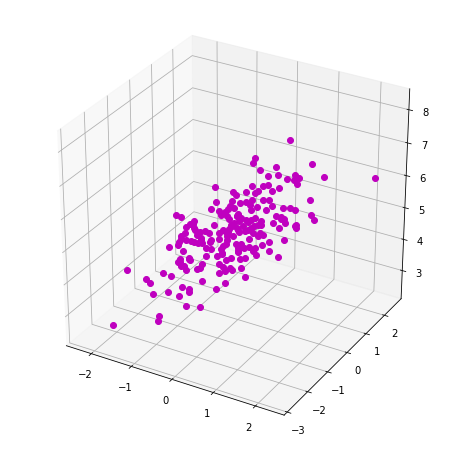

In [76]:
import numpy as np
import pandas as pd

#creating a plane (now maximum variance would be explained by only 2 axis)

mean_vec1 = np.array([0,0,5])
cov_mat1 = np.array([[1,0,1],[0,1,0],[0.5,0,0.9]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 200)



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')        #111 is 1 row and 1 column of plot and last 1 is for position
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o',color="m")
plt.show()

In [77]:
df=pd.DataFrame(class1)
df.to_csv('3d_points.csv', index=False)

In [78]:
pca = PCA()
pca.fit(class1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [79]:
k = 0
total = 0
while total <.9:
    total = total + pca.explained_variance_ratio_[k]  #adding variance ratio 
    k = k + 1
k

2

In [80]:
pca = PCA(n_components=2)
#pca.fit(class1)

skl_transformed = pca.fit_transform(class1) 
pca.components_
pca.explained_variance_ratio_ #explained variance ratios wrt each component 

array([0.58578734, 0.33467214])

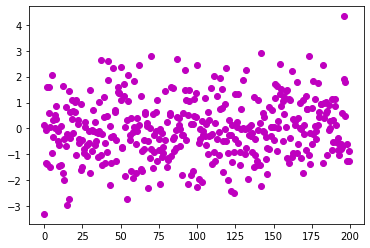

In [81]:
plt.plot(skl_transformed, 'o',color="m")
plt.show()

### 5.PCA on images--Olevitti images

In [83]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [85]:
oli=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/fy/scikit_learn_data


In [86]:
oli

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [87]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [89]:
oli['data'].shape

(400, 4096)

In [90]:
oli['images'].shape

(400, 64, 64)

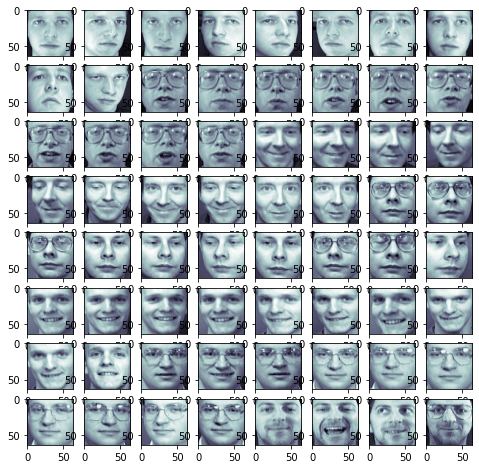

In [94]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oli.images[i],cmap=plt.cm.bone)
plt.show()

In [96]:
x=oli.data
y=oli.target

In [97]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [99]:
pca.components_.shape

(400, 4096)

In [101]:
k=0
total=sum(pca.explained_variance_)
currentsum=0
while currentsum/total<0.95:
    currentsum+=pca.explained_variance_[k]
    k+=1
k

123

In [105]:
pca=PCA(n_components=k,whiten=True)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [106]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

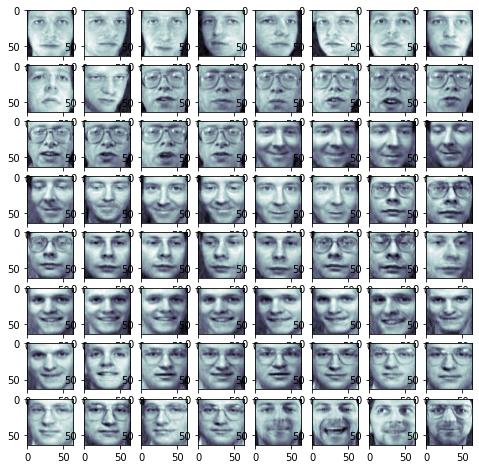

In [107]:
x_approx_images=x_approx.reshape((400,64,64))
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

**we reduce the dimensions but almost all the information still saved**

In [108]:
eigenv=pca.components_
eigenv.shape

(123, 4096)

In [109]:
eigenfaces=eigenv.reshape((123,64,64))

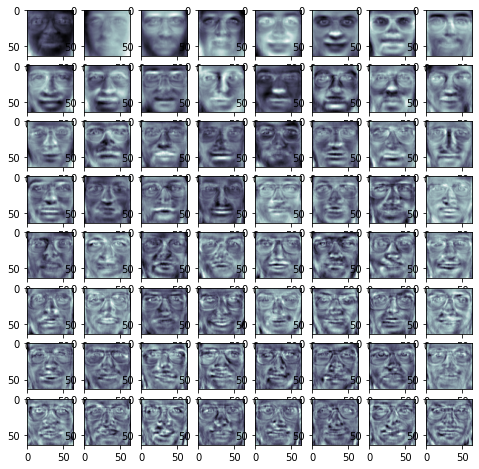

In [111]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()